In [4]:
import pandas as pd

In [5]:
df= pd.read_csv(r"D:\UIDAI\api_data_aadhar_enrolment\api_data_aadhar_enrolment_0_500000.csv")


In [6]:
df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [7]:
df.shape

(500000, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            500000 non-null  object
 1   state           500000 non-null  object
 2   district        500000 non-null  object
 3   pincode         500000 non-null  int64 
 4   age_0_5         500000 non-null  int64 
 5   age_5_17        500000 non-null  int64 
 6   age_18_greater  500000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 26.7+ MB


In [9]:
# Check total number of duplicate rows
df.duplicated().sum()


np.int64(6036)

In [10]:
# Count missing values in each column
df.isnull().sum()


date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [11]:
#Clean and standardize column names
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [12]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
df['date'].head()

0   2025-03-02
1   2025-03-09
2   2025-03-09
3   2025-03-09
4   2025-03-09
Name: date, dtype: datetime64[ns]

In [13]:
df['pincode'] = df['pincode'].astype(str)
df['pincode']

0         793121
1         560043
2         208001
3         202133
4         560016
           ...  
499995    509207
499996    502220
499997    502256
499998    502286
499999    521402
Name: pincode, Length: 500000, dtype: object

In [14]:
df.dtypes

date              datetime64[ns]
state                     object
district                  object
pincode                   object
age_0_5                    int64
age_5_17                   int64
age_18_greater             int64
dtype: object

In [15]:
#Remove duplicate rows
df.duplicated().sum()


np.int64(6036)

In [16]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(493964, 7)

In [18]:
#Validate logical values
(df[['age_0_5', 'age_5_17','age_18_greater']] < 0).sum()


age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [19]:
#Detect outliers
df[['age_0_5', 'age_5_17','age_18_greater']].describe()


,age_0_5,age_5_17,age_18_greater
count,493964.000000,493964.000000,493964.000000
mean,4.052030,2.327807,0.247680
std,24.559736,20.311225,4.464724
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000
max,2688.000000,1812.000000,855.000000


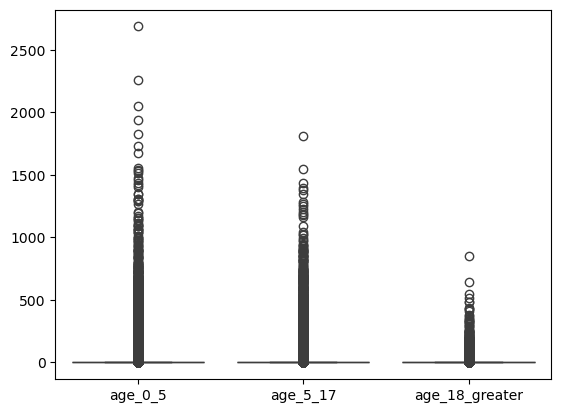

In [20]:
#Visual check (Boxplot)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[['age_0_5', 'age_5_17','age_18_greater']])
plt.show()


In [38]:
# Ensure columns are strings
df['state'] = df['state'].astype(str)
df['district'] = df['district'].astype(str)

# Replace '&' with 'and' in state and district columns
df['state'] = df['state'].str.replace('&', 'and', regex=False)
df['district'] = df['district'].str.replace('&', 'and', regex=False)


In [39]:
df['state'].nunique()

37

In [40]:
#mapping the standarised naming convention used by indian government
state_mapping = {
    # West Bengal variants
    'WEST BENGAL': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West bengal': 'West Bengal',

    # Odisha variants
    'Orissa': 'Odisha',
    'ODISHA': 'Odisha',

    # Andhra Pradesh variants
    'andhra pradesh': 'Andhra Pradesh',

    # Puducherry variants
    'Pondicherry': 'Puducherry',

    # Dadra & Daman variants
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'The Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli and Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',

    # Jammu & Kashmir variants
    'Jammu And Kashmir': 'Jammu and Kashmir'
}



In [41]:
# Convert state column to string
df['state'] = df['state'].astype(str)

# Normalize text: strip spaces and title case
df['state'] = df['state'].str.strip().str.title()

# Replace variants with official names
df['state'] = df['state'].replace(state_mapping)

# Check unique values after standardization
df['state'].unique()


array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'Dadra And Nagar Haveli And Daman And Diu', 'Arunachal Pradesh',
       'Himachal Pradesh', 'Goa', 'Ladakh', 'Andaman And Nicobar Islands',
       'Puducherry', 'Lakshadweep', '100000'], dtype=object)

In [43]:
df['state'].nunique()

37

In [44]:
df['state'] = df['state'].replace({
    'Dadra And Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu'
})


In [49]:
df = df[df['state'] != '100000']


In [50]:
df['state'].nunique()

36

In [51]:
df['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'Dadra and Nagar Haveli and Daman and Diu', 'Arunachal Pradesh',
       'Himachal Pradesh', 'Goa', 'Ladakh', 'Andaman And Nicobar Islands',
       'Puducherry', 'Lakshadweep'], dtype=object)

In [52]:
sorted(df['district'].unique())

['24 Paraganas North',
 '24 Paraganas South',
 'Adilabad',
 'Agar Malwa',
 'Agra',
 'Ahmadabad',
 'Ahmadnagar',
 'Ahmed Nagar',
 'Ahmedabad',
 'Ahmednagar',
 'Aizawl',
 'Ajmer',
 'Akola',
 'Alappuzha',
 'Aligarh',
 'Alipurduar',
 'Alirajpur',
 'Allahabad',
 'Alluri Sitharama Raju',
 'Almora',
 'Alwar',
 'Ambala',
 'Ambedkar Nagar',
 'Amethi',
 'Amravati',
 'Amreli',
 'Amritsar',
 'Amroha',
 'Anakapalli',
 'Anand',
 'Anantapur',
 'Ananthapur',
 'Ananthapuramu',
 'Anantnag',
 'Andamans',
 'Angul',
 'Anjaw',
 'Annamayya',
 'Anugul',
 'Anuppur',
 'Araria',
 'Ariyalur',
 'Arvalli',
 'Arwal',
 'Ashok Nagar',
 'Ashoknagar',
 'Auraiya',
 'Aurangabad',
 'Aurangabad(Bh)',
 'Ayodhya',
 'Azamgarh',
 'Badgam',
 'Bagalkot',
 'Bagalkot *',
 'Bageshwar',
 'Baghpat',
 'Bahraich',
 'Bajali',
 'Baksa',
 'Balaghat',
 'Balangir',
 'Baleshwar',
 'Baleswar',
 'Ballari',
 'Ballia',
 'Balod',
 'Baloda Bazar',
 'Balrampur',
 'Banas Kantha',
 'Banaskantha',
 'Banda',
 'Bandipore',
 'Bandipur',
 'Bangalore',
 'Ba

In [48]:
sorted(df['state'].unique())

['100000',
 'Andaman And Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [55]:
df['district'].nunique()

952

In [56]:
df['district'] = (
    df['district']
    .astype(str)
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)      # normalize spaces
    .str.replace(r'\*$', '', regex=True)       # remove trailing *
    .str.replace(r'\.$', '', regex=True)       # remove trailing dot
)


In [57]:
# Ensure district column is string
df['district'] = df['district'].astype(str)

# Clean district names
df['district'] = (
    df['district']
    .str.strip()                                   # remove leading/trailing spaces
    .str.replace('&', 'and', regex=False)          # replace & with 'and'
    .str.replace(r'[^A-Za-z0-9\s]', '', regex=True)  
    # removes ALL symbols, keeps only:
    # letters, digits, and spaces
    .str.replace(r'\s+', ' ', regex=True)          # normalize multiple spaces
    .str.title()                                   # capitalize each word
)


In [58]:
df['district'].nunique()

930

In [59]:
#Clean basic formatting
df['district'] = (
    df['district']
      .str.strip()
      .str.replace(r"\*", "", regex=True)   # remove *
      .str.replace(r"\(.*?\)", "", regex=True)  # remove (Kar), (M), etc.
      .str.replace(r"\s+", " ", regex=True) # fix double spaces
      .str.title()
)
df['district'].unique()

array(['East Khasi Hills', 'Bengaluru Urban', 'Kanpur Nagar', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Firozabad', 'Purbi Champaran',
       'Maharajganj', 'Aurangabad', 'Ghaziabad', 'Faridabad', 'Madhubani',
       'Sikar', 'Bhagalpur', 'Amritsar', 'Gurugram',
       'Gautam Buddha Nagar', 'West Delhi', 'Bhind', 'Gwalior', 'Katni',
       'Coochbehar', 'Lucknow', 'Dinajpur Uttar', 'Marigaon', 'Kokrajhar',
       'Agra', 'Haridwar', 'Nagaon', 'Parbhani', 'West Khasi Hills',
       'North West Delhi', 'West Jaintia Hills', 'Unnao', 'Saharanpur',
       'Dibrugarh', 'Udalguri', 'Chirang', 'Kamrup', 'Dhubri', 'Jaunpur',
       'Thane', 'Dhemaji', 'Banas Kantha', 'Tinsukia', 'Spsr Nellore',
       'Barpeta', 'Sonitpur', 'Baksa', 'Ludhiana', 'Patan', 'Kanchipuram',
       'Patna', 'Lakhimpur', 'Bongaigaon', 'Vadodara', 'Nainital',
       'Dehradun', 'Hojai', 'Dohad', 'Morbi', 'Raipur', 'Gorakhpur',
       'Bulandshahr', 'Mathura', 'Pashchim Champaran', 'Bijapur',
       'Deoghar', 'Muzaf

In [60]:
sorted(df['district'].unique())

['24 Paraganas North',
 '24 Paraganas South',
 'Adilabad',
 'Agar Malwa',
 'Agra',
 'Ahmadabad',
 'Ahmadnagar',
 'Ahmed Nagar',
 'Ahmedabad',
 'Ahmednagar',
 'Aizawl',
 'Ajmer',
 'Akola',
 'Alappuzha',
 'Aligarh',
 'Alipurduar',
 'Alirajpur',
 'Allahabad',
 'Alluri Sitharama Raju',
 'Almora',
 'Alwar',
 'Ambala',
 'Ambedkar Nagar',
 'Amethi',
 'Amravati',
 'Amreli',
 'Amritsar',
 'Amroha',
 'Anakapalli',
 'Anand',
 'Anantapur',
 'Ananthapur',
 'Ananthapuramu',
 'Anantnag',
 'Andamans',
 'Angul',
 'Anjaw',
 'Annamayya',
 'Anugul',
 'Anuppur',
 'Araria',
 'Ariyalur',
 'Arvalli',
 'Arwal',
 'Ashok Nagar',
 'Ashoknagar',
 'Auraiya',
 'Aurangabad',
 'Aurangabadbh',
 'Ayodhya',
 'Azamgarh',
 'Badgam',
 'Bagalkot',
 'Bageshwar',
 'Baghpat',
 'Bahraich',
 'Bajali',
 'Baksa',
 'Balaghat',
 'Balangir',
 'Baleshwar',
 'Baleswar',
 'Ballari',
 'Ballia',
 'Balod',
 'Baloda Bazar',
 'Balrampur',
 'Banas Kantha',
 'Banaskantha',
 'Banda',
 'Bandipore',
 'Bandipur',
 'Bangalore',
 'Bangalore Rural',
 

In [61]:
before_dist=df['district'].nunique()

In [62]:


district_mapping = {
    # Gujarat
    "Ahmadabad": "Ahmedabad",

    # Maharashtra
    "Ahmadnagar": "Ahmednagar",
    "Ahmed Nagar": "Ahmednagar",
    "Raebareli": "Rae Bareli",
    'Osmanabad': 'Dharashiv',
    
    # Karnataka
    "Tumkur": "Tumakuru",
    "Belgaum": "Belagavi",
    "Bellary": "Ballari",
    "Bijapur": "Vijayapura",
    "Gulbarga": "Kalaburagi",
    "Bijapur": "Vijayapura",
    "Bijapur Kar": "Vijayapura",
    'Chikmagalur': 'Chikkamagaluru',
    'Chickmagalur': 'Chikkamagaluru',
    'Chamrajanagar': 'Chamarajanagar',
    'Chamrajnagar': 'Chamarajanagar',

    # Tamil Nadu
    "Tuticorin": "Thoothukudi",
    "Villupuram": "Viluppuram",
    "Thoothukkudi": "Thoothukudi",
    "Kanniyakumari": "Kanyakumari",
    
    # Telangana / AP
    "Cuddapah": "Ysr Kadapa",
    "Mahabub Nagar": "Mahabubnagar",
    "Mahbubnagar": "Mahabubnagar",
    "Warangal Urban": "Warangal",
    'Rangareddi': 'Rangareddy',
    'Kvrangareddy': 'Rangareddy',
    'Kv Rangareddy': 'Rangareddy',
    'Medchalmalkajgiri': 'Medchal Malkajgiri',
    'Ysr': 'Ysr Kadapa',
    'Cuddapah': 'Ysr Kadapa',

    # West Bengal
    "East Midnapore": "Purba Medinipur",
    "West Midnapore": "Paschim Medinipur",
    "Burdwan": "Purba Bardhaman",
    "West Medinipur": "Paschim Medinipur",
    "East Midnapur": "Purba Medinipur",
    "Barddhaman": "Purba Bardhaman",
    'North Twenty Four Parganas': 'North 24 Parganas',
    'South Twenty Four Parganas': 'South 24 Parganas',
    'Hooghiy': 'Hooghly',
    'Hugli': 'Hooghly',

    # UP
    "Faizabad": "Ayodhya",
    "Allahabad": "Prayagraj",
    "Jyotiba Phule Nagar": "Amroha",
    'Bara Banki': 'Barabanki',

    # Andhra Pradesh
    "Anantapur": "Ananthapuramu",

    # Odisha
    'Baleshwar': 'Baleswar',
    'Anugul': 'Angul',

    # Haryana
    "Yamuna Nagar": "Yamunanagar",

    # Ladakh
    "Leh": "Leh Ladakh",

    # Himachal Pradesh
    'Lahulandspiti': 'Lahaul And Spiti'

}


In [63]:
#before and after district mapping 
df['district'] = df['district'].replace(district_mapping)
after_dist= df['district'].nunique()
before_dist, after_dist

(930, 887)

In [64]:
sorted(df['district'].unique())

['24 Paraganas North',
 '24 Paraganas South',
 'Adilabad',
 'Agar Malwa',
 'Agra',
 'Ahmedabad',
 'Ahmednagar',
 'Aizawl',
 'Ajmer',
 'Akola',
 'Alappuzha',
 'Aligarh',
 'Alipurduar',
 'Alirajpur',
 'Alluri Sitharama Raju',
 'Almora',
 'Alwar',
 'Ambala',
 'Ambedkar Nagar',
 'Amethi',
 'Amravati',
 'Amreli',
 'Amritsar',
 'Amroha',
 'Anakapalli',
 'Anand',
 'Ananthapur',
 'Ananthapuramu',
 'Anantnag',
 'Andamans',
 'Angul',
 'Anjaw',
 'Annamayya',
 'Anuppur',
 'Araria',
 'Ariyalur',
 'Arvalli',
 'Arwal',
 'Ashok Nagar',
 'Ashoknagar',
 'Auraiya',
 'Aurangabad',
 'Aurangabadbh',
 'Ayodhya',
 'Azamgarh',
 'Badgam',
 'Bagalkot',
 'Bageshwar',
 'Baghpat',
 'Bahraich',
 'Bajali',
 'Baksa',
 'Balaghat',
 'Balangir',
 'Baleswar',
 'Ballari',
 'Ballia',
 'Balod',
 'Baloda Bazar',
 'Balrampur',
 'Banas Kantha',
 'Banaskantha',
 'Banda',
 'Bandipore',
 'Bandipur',
 'Bangalore',
 'Bangalore Rural',
 'Banka',
 'Bankura',
 'Banswara',
 'Bapatla',
 'Barabanki',
 'Baramula',
 'Baran',
 'Bardez',
 'Ba

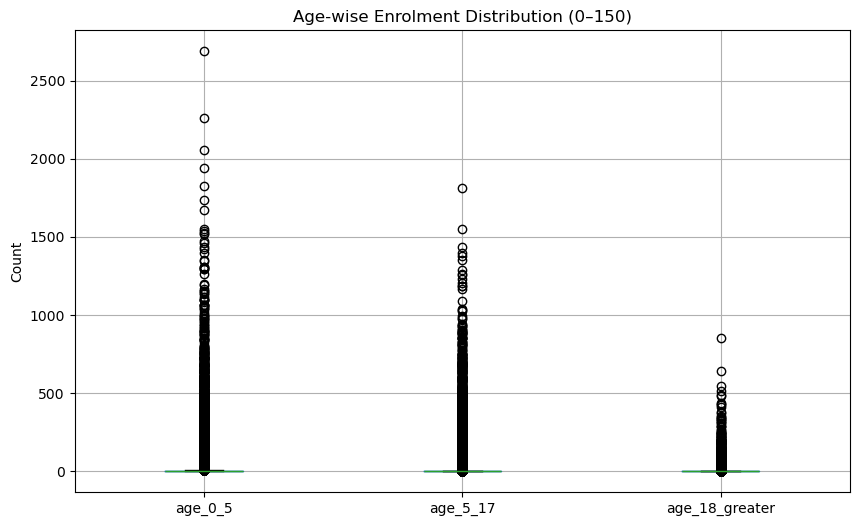

In [65]:
#outliers of data for my 3 age groups of people
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

df[['age_0_5', 'age_5_17', 'age_18_greater']].boxplot()

plt.title('Age-wise Enrolment Distribution (0–150)')
plt.ylabel('Count')

plt.show()


In [66]:
df[['age_0_5', 'age_5_17', 'age_18_greater']].max()


age_0_5           2688
age_5_17          1812
age_18_greater     855
dtype: int64

In [74]:
#creating a seperate col for month
df['month'] = df['date'].dt.month_name()
df['month'].unique()


array(['March', 'April', 'May', 'June', 'July', 'September', 'October'],
      dtype=object)

In [75]:
month_order=[
    'March','April','May','June','July','September','October'
]

In [76]:
df['month'] = pd.Categorical(
    df['month'],
    categories=month_order,
    ordered=True
)


In [77]:
df['month'].unique()

['March', 'April', 'May', 'June', 'July', 'September', 'October']
Categories (7, object): ['March' < 'April' < 'May' < 'June' < 'July' < 'September' < 'October']

In [78]:
#in that yr how many citizens of each grp enrolled
df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()


age_0_5           2001557
age_5_17          1149852
age_18_greater     122333
dtype: int64

In [79]:
#in percentage
total = df[['age_0_5','age_5_17','age_18_greater']].sum().sum()

(df[['age_0_5','age_5_17','age_18_greater']].sum() / total) * 100


age_0_5           61.139729
age_5_17          35.123476
age_18_greater     3.736794
dtype: float64

In [80]:
#monthwise and age group tabulation
monthly = df.groupby('month')[['age_0_5','age_5_17','age_18_greater']].sum()
monthly

C:\Users\DELL\AppData\Local\Temp\ipykernel_19612\3806495538.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = df.groupby('month')[['age_0_5','age_5_17','age_18_greater']].sum()


,age_0_5,age_5_17,age_18_greater
month,,,
March,5367,7407,3808
April,141154,91371,24913
May,95342,71690,16584
June,98943,99911,16880
July,318352,263333,35183
September,995612,465401,14854
October,346787,150739,10111


In [81]:
y_min = monthly[['age_0_5', 'age_5_17', 'age_18_greater']].min().min()
y_max = monthly[['age_0_5', 'age_5_17', 'age_18_greater']].max().max()


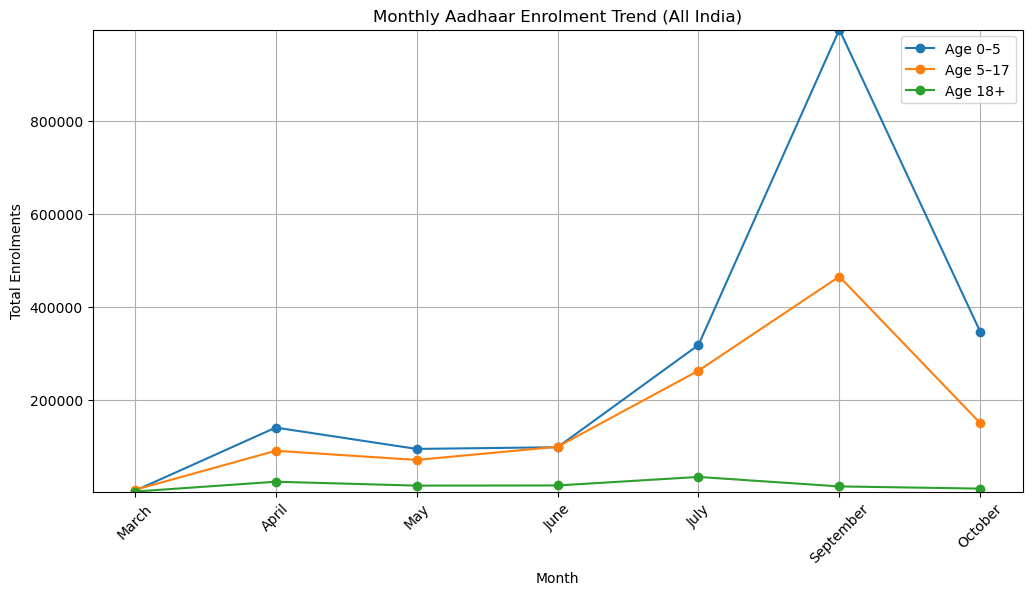

In [82]:
#month and age groups wise line charts
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(monthly.index, monthly['age_0_5'], marker='o', label='Age 0–5')
plt.plot(monthly.index, monthly['age_5_17'], marker='o', label='Age 5–17')
plt.plot(monthly.index, monthly['age_18_greater'], marker='o', label='Age 18+')

plt.title('Monthly Aadhaar Enrolment Trend (All India)')
plt.xlabel('Month')
plt.ylabel('Total Enrolments')

# ✅ Set y-axis to actual data range
plt.ylim(y_min, y_max)

plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


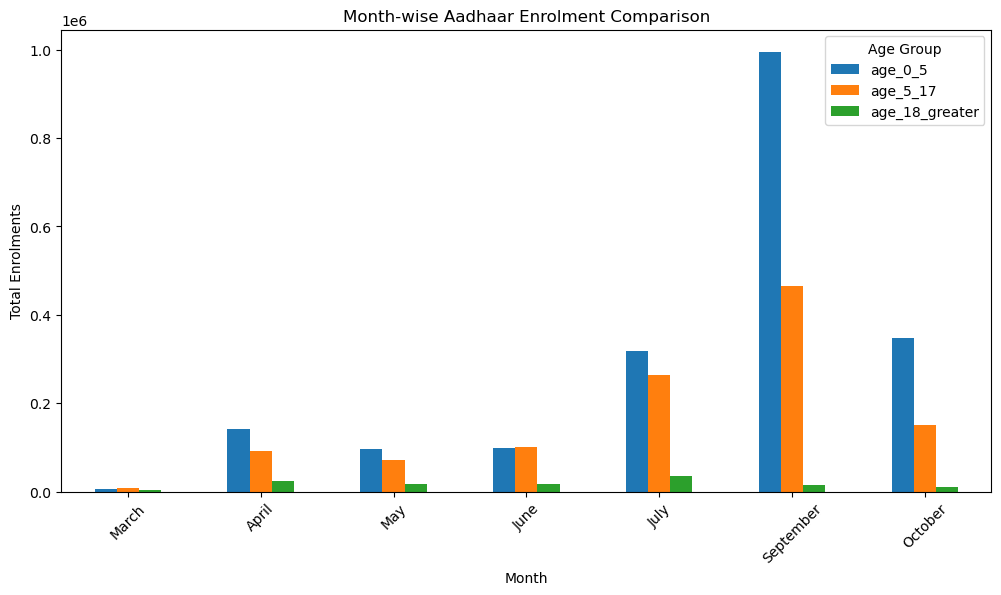

In [83]:
#monthwise and age groups bar plot
monthly.plot(
    kind='bar',
    figsize=(12, 6)
)

plt.title('Month-wise Aadhaar Enrolment Comparison')
plt.xlabel('Month')
plt.ylabel('Total Enrolments')
plt.xticks(rotation=45)
plt.legend(title='Age Group')

plt.show()


In [84]:
state_totals = df.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum()

In [85]:
state_totals

,age_0_5,age_5_17,age_18_greater
state,,,
Andaman And Nicobar Islands,225,23,0
Andhra Pradesh,50645,7609,826
Arunachal Pradesh,1248,1567,50
Assam,99572,49704,17122
Bihar,158991,218647,9877
Chandigarh,1074,125,11
Chhattisgarh,39781,9196,1500
Dadra and Nagar Haveli and Daman and Diu,1061,204,35
Delhi,44388,16679,2478


In [86]:
state_totals = df.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum()
district_totals = df.groupby('district')[['age_0_5','age_5_17','age_18_greater']].sum()


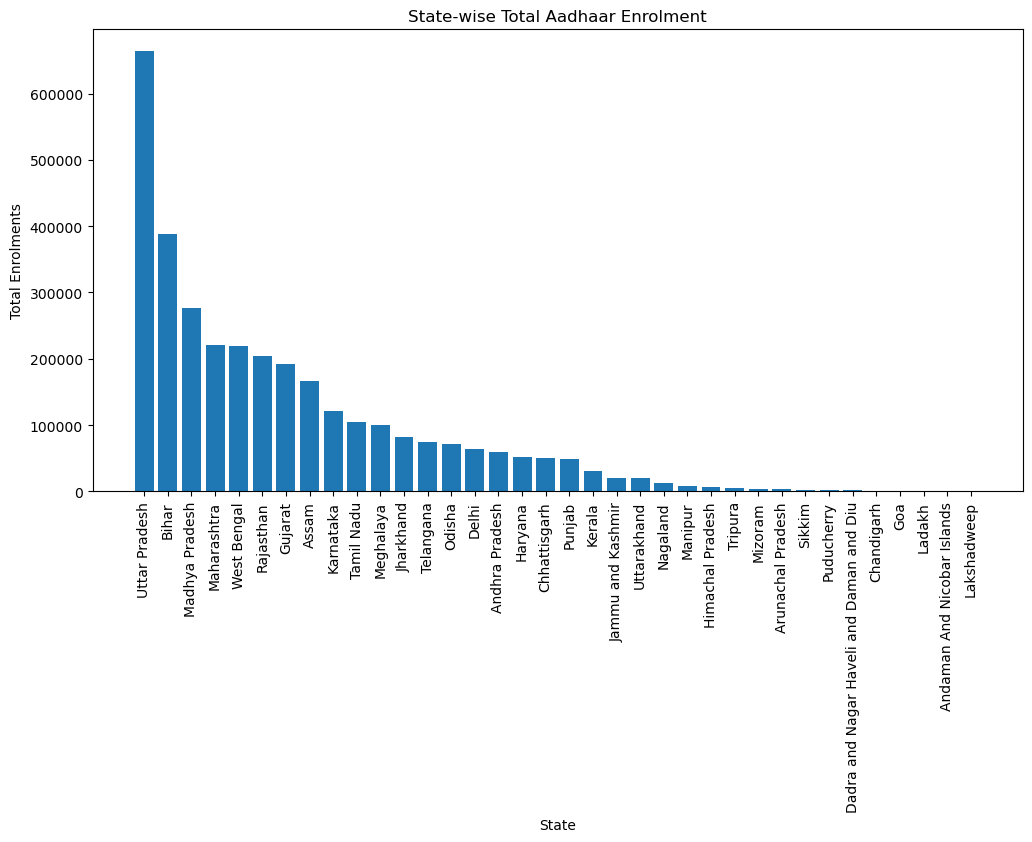

In [87]:
#statewise enrollment graph
# Add total enrolment per state
state_totals['total'] = state_totals.sum(axis=1)

# Sort by total enrolment
state_totals_sorted = state_totals.sort_values('total', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(state_totals_sorted.index, state_totals_sorted['total'])
plt.title('State-wise Total Aadhaar Enrolment')
plt.xlabel('State')
plt.ylabel('Total Enrolments')
plt.xticks(rotation=90)
plt.show()


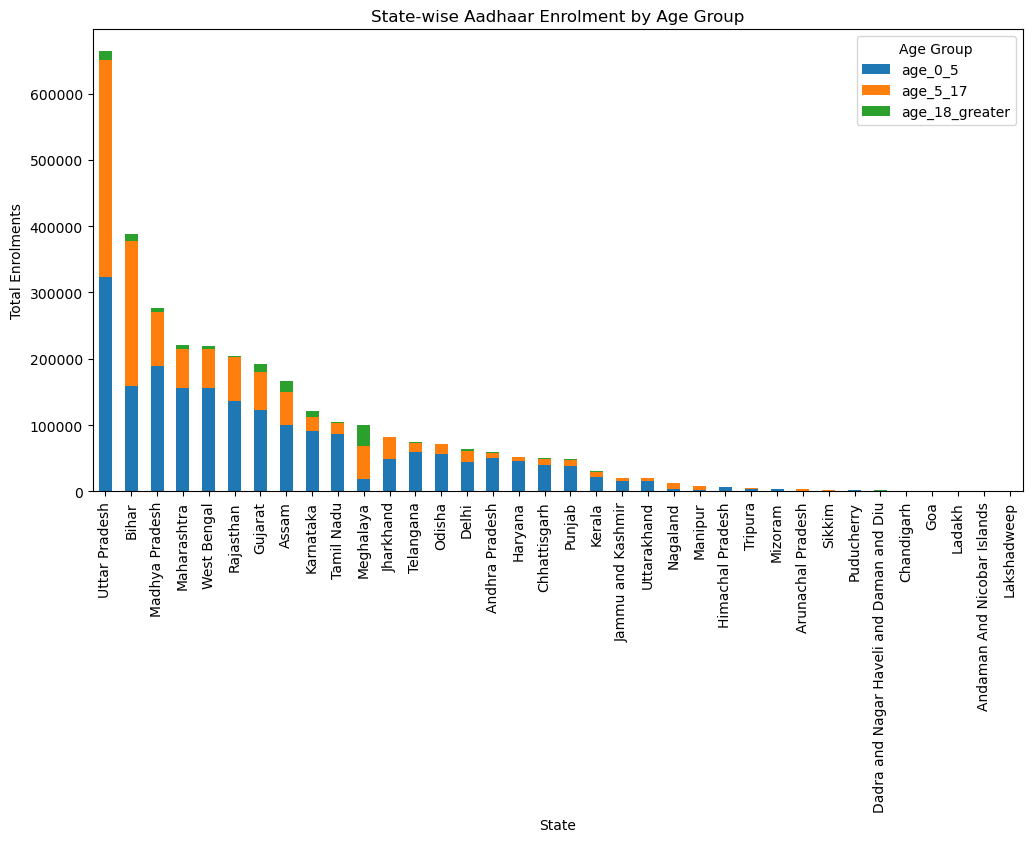

In [88]:
#State-wise Age Group Composition (Stacked Bar Chart)
state_totals_sorted[['age_0_5','age_5_17','age_18_greater']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.title('State-wise Aadhaar Enrolment by Age Group')
plt.xlabel('State')
plt.ylabel('Total Enrolments')
plt.xticks(rotation=90)
plt.legend(title='Age Group')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19612\832043471.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['state', 'month'])['total_enrolment']


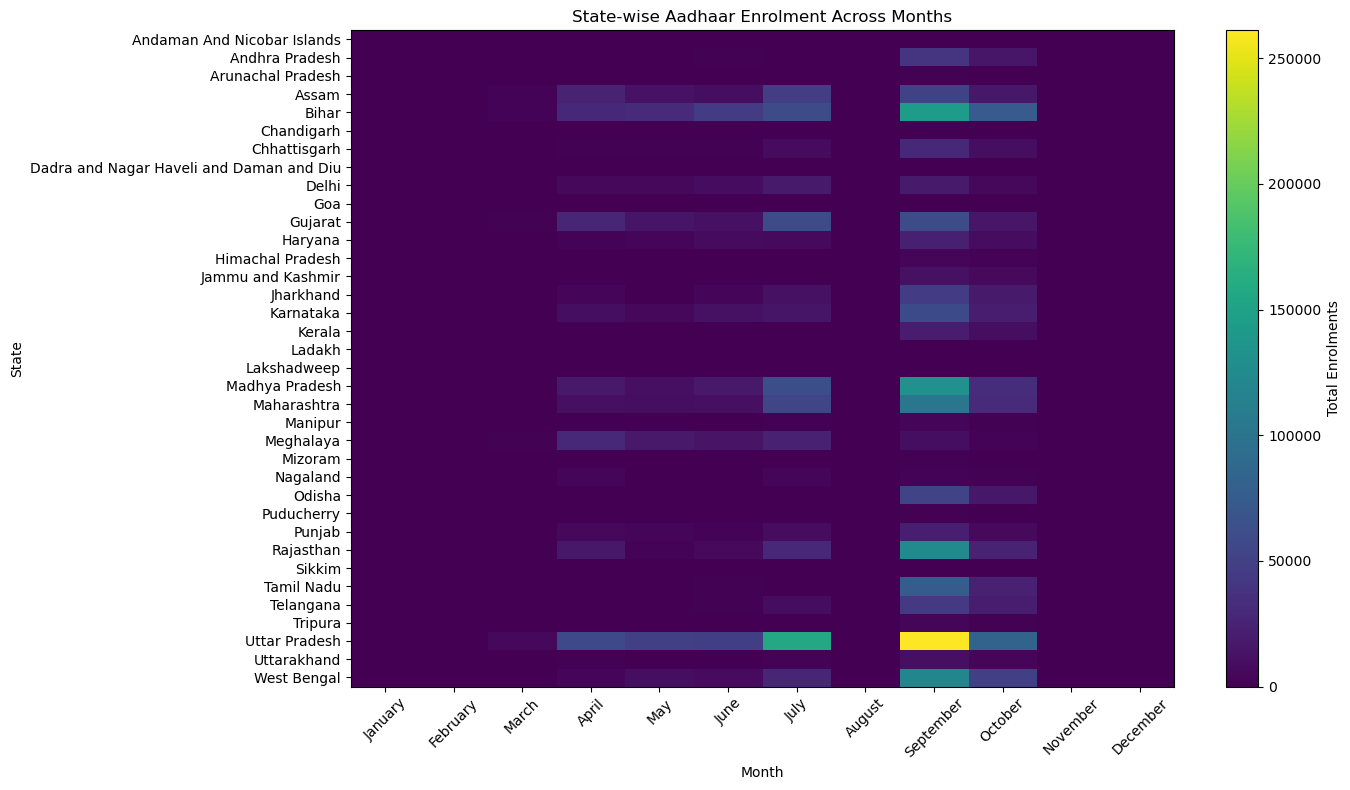

In [89]:
#total enrollment 
df['total_enrolment'] = (
    df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
)
#grouping state, month and total enrollment
state_month = (
    df.groupby(['state', 'month'])['total_enrolment']
    .sum()
    .reset_index()
)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
state_month_pivot = state_month.pivot(
    index='state',
    columns='month',          
    values='total_enrolment'
).reindex(columns=month_order)

#heatmap for state, month and total enrollment in that month
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.imshow(state_month_pivot.fillna(0), aspect='auto')
plt.colorbar(label='Total Enrolments')

plt.title('State-wise Aadhaar Enrolment Across Months')
plt.xlabel('Month')
plt.ylabel('State')

plt.xticks(
    ticks=range(len(state_month_pivot.columns)),
    labels=state_month_pivot.columns,
    rotation=45
)

plt.yticks(
    ticks=range(len(state_month_pivot.index)),
    labels=state_month_pivot.index
)

plt.tight_layout()
plt.show()



C:\Users\DELL\AppData\Local\Temp\ipykernel_19612\1992280461.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered.groupby(['state', 'month'])['total_enrolment']


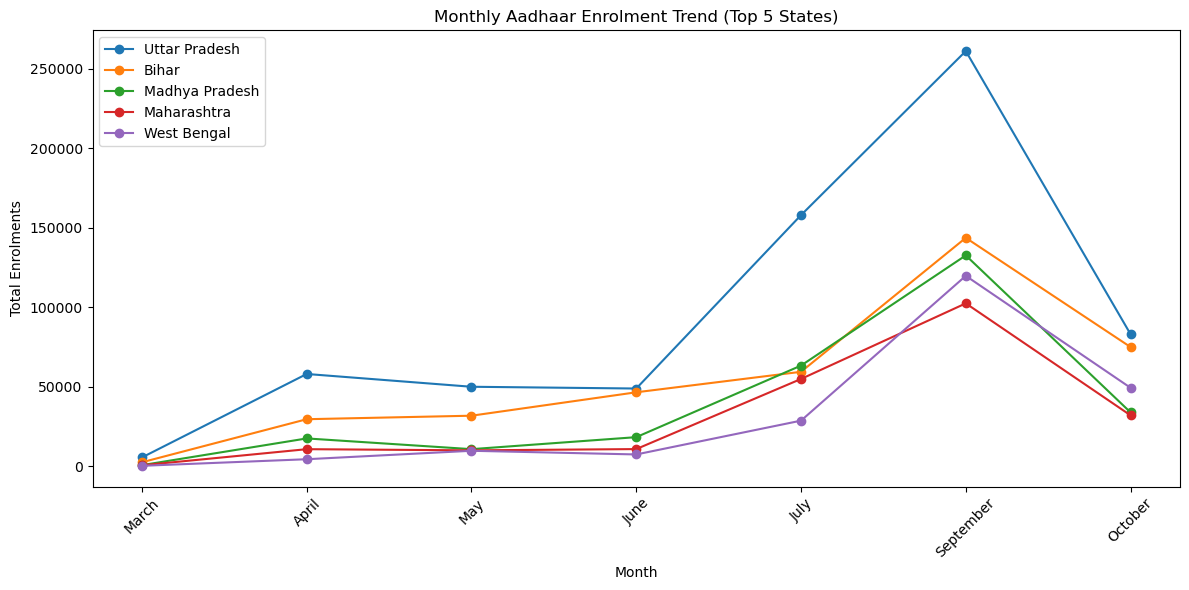

In [90]:
# Select top 5 states by total enrolment based on month
top_states = (
    df.groupby('state')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data
filtered = df[df['state'].isin(top_states)]

# Aggregate by state and month
state_month_trend = (
    filtered.groupby(['state', 'month'])['total_enrolment']
    .sum()
    .reset_index()
)

# Plot line chart
plt.figure(figsize=(12, 6))

for state in top_states:
    data = state_month_trend[state_month_trend['state'] == state]
    plt.plot(data['month'], data['total_enrolment'], marker='o', label=state)

plt.title('Monthly Aadhaar Enrolment Trend (Top 5 States)')
plt.xlabel('Month')
plt.ylabel('Total Enrolments')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19612\2368083212.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered.groupby(['state', 'month'])['total_enrolment']


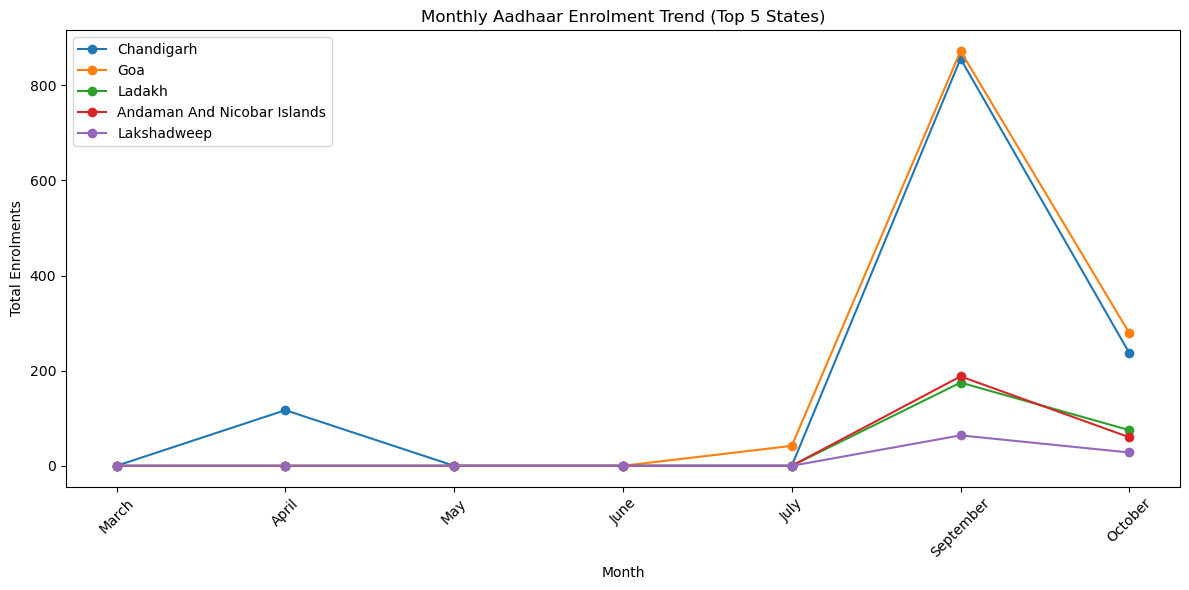

In [91]:
# Select last 5 states by total enrolment based in month
top_states = (
    df.groupby('state')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
    .tail(5)
    .index
)

# Filter data
filtered = df[df['state'].isin(top_states)]

# Aggregate by state and month
state_month_trend = (
    filtered.groupby(['state', 'month'])['total_enrolment']
    .sum()
    .reset_index()
)

# Plot line chart
plt.figure(figsize=(12, 6))

for state in top_states:
    data = state_month_trend[state_month_trend['state'] == state]
    plt.plot(data['month'], data['total_enrolment'], marker='o', label=state)

plt.title('Monthly Aadhaar Enrolment Trend (Top 5 States)')
plt.xlabel('Month')
plt.ylabel('Total Enrolments')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


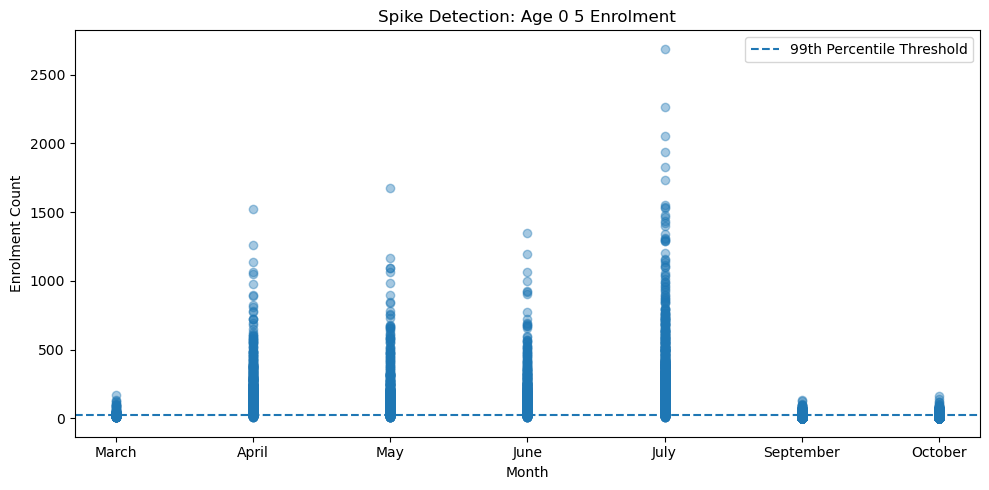

c:\Users\DELL\anaconda3\envs\clean_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


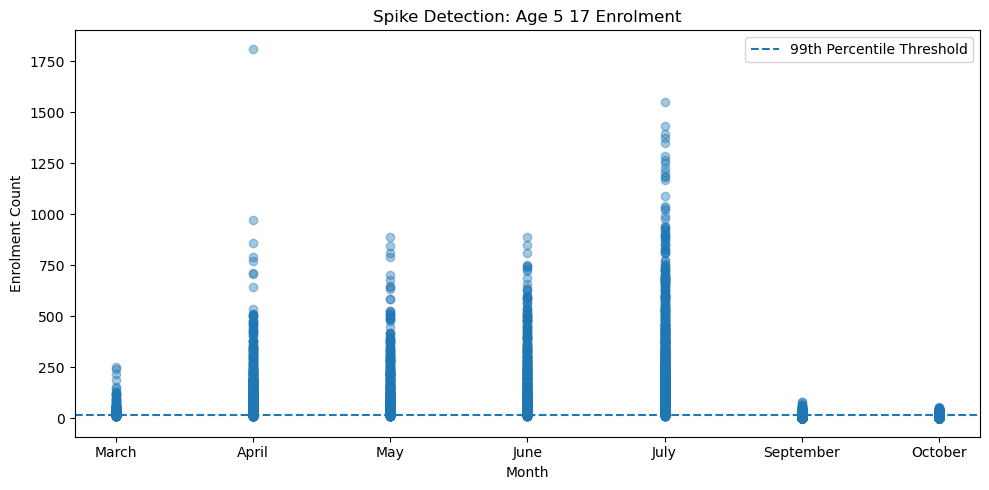

C:\Users\DELL\AppData\Local\Temp\ipykernel_19612\3045824520.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\DELL\anaconda3\envs\clean_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


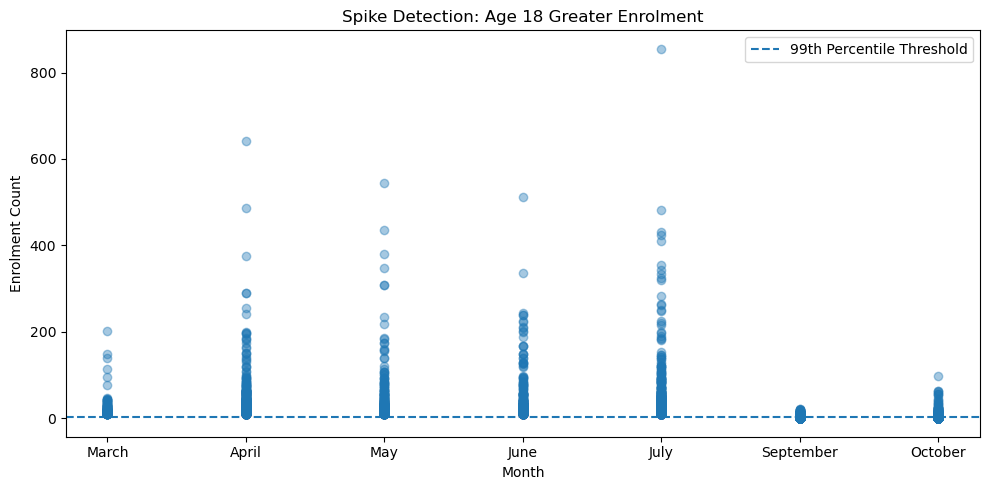

In [92]:

#Spike Detection for ALL 3 Age Groups (Separate Graphs)
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater']

for col in age_columns:
    
    threshold_99 = df[col].quantile(0.99)

    spike_records = df[df[col] > threshold_99]
    
    plt.figure(figsize=(10, 5))
    plt.scatter(df['month'], df[col], alpha=0.4)
    plt.axhline(threshold_99, linestyle='--', label='99th Percentile Threshold')
    
    plt.title(f'Spike Detection: {col.replace("_", " ").title()} Enrolment')
    plt.xlabel('Month')
    plt.ylabel('Enrolment Count')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [93]:
df.to_csv("aadhar_enrollment_cleaned(1).csv", index=False)
